In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading dataset
data=pd.read_csv('Updated_Claimants_Dataset.csv')
data.head() # Printing the first 5 rows

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean


In [ ]:
data.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,6684.598149,10341.430276,0.480597,8787.805463
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,3785.039412,5678.906970,0.499810,4942.577454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,296.410000,562.760000,0.000000,424.520000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,3414.052500,5308.890000,0.000000,4389.100000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,6781.575000,10571.250000,0.000000,8898.245000
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,9708.882500,15291.665000,1.000000,12646.157500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,15794.810000,19988.570000,1.000000,19566.510000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1328 non-null   float64
 3   CLMINSUR                1299 non-null   float64
 4   SEATBELT                1292 non-null   float64
 5   CLMAGE                  1151 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   object 
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   object 
 12  Driving_Record          1340 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 136.2+ KB


In [ ]:
#checking duplicates
data.duplicated().sum()

0

There is no duplicates in dataset

# *Checking null values*

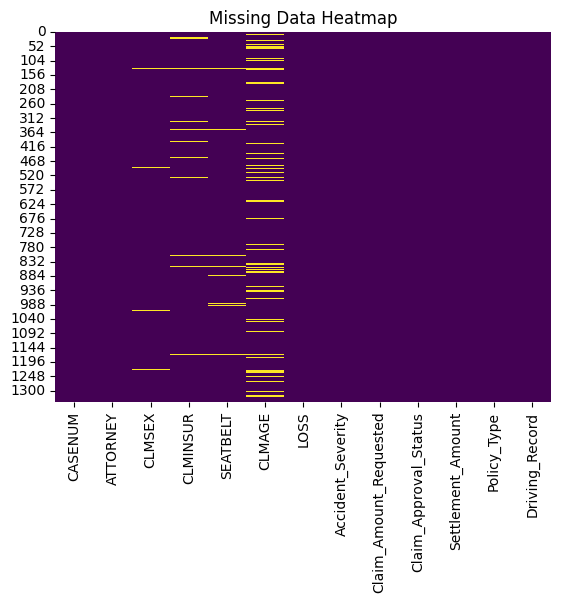

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [ ]:
data.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


There is null values in CLMSEX, CLMINSUR, SEATBELT, CLMAGE columns

In [ ]:
data['CLMSEX'].unique()

array([ 0.,  1., nan])

In [ ]:
data['CLMINSUR'].unique()

array([ 1.,  0., nan])

In [ ]:
data['SEATBELT'].unique()

array([ 0.,  1., nan])

In [ ]:
data['CLMAGE'].unique()

array([50., 18.,  5., 31., 30., 35.,  9., 34., 60., nan, 37., 41.,  7.,
       40., 58.,  3., 38., 39., 54., 61.,  0., 16., 17., 33., 46., 55.,
        1., 19., 10., 44.,  4., 56., 63., 47., 57., 11.,  8., 71.,  6.,
       43., 69., 48., 75., 80., 66., 13., 51., 15., 65., 14., 49., 77.,
       36., 45., 53., 59., 67., 83., 64., 70., 73., 95., 88., 78., 84.,
       68., 74., 86., 76.])

In [ ]:
#filling null values
data['CLMSEX']=data['CLMSEX'].fillna(data['CLMSEX'].mode()[0])
data['CLMINSUR']=data['CLMINSUR'].fillna(data['CLMINSUR'].mode()[0])
data['SEATBELT']=data['SEATBELT'].fillna(data['SEATBELT'].mode()[0])
data['CLMAGE']=data['CLMAGE'].fillna(data['CLMAGE'].median())

In [ ]:
data.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


we have filled the null values with mode in CLMSEX, CLMINSUR, SEATBELT and with mean in CLMAGE

 ## *Encoding categorical data into numerical format*

In [ ]:
data['Accident_Severity'].unique()

array(['Severe', 'Minor', 'Moderate'], dtype=object)

In [ ]:
data['Policy_Type'].unique()

array(['Third-Party', 'Comprehensive'], dtype=object)

In [ ]:
data['Driving_Record'].unique()

array(['Clean', 'Minor Offenses', 'Major Offenses'], dtype=object)

In [ ]:
# Finding Catogorical columns details - Accident_Severity, Policy_Type, Driving_Record
print("Accident_Severity column contains unique values and the count:", data["Accident_Severity"].value_counts())
print("Policy_Type column contains unique values and the count:", data["Policy_Type"].value_counts())
print("Driving_Record column contains unique values and the count:", data["Driving_Record"].value_counts())

Accident_Severity column contains unique values and the count: Accident_Severity
Minor       465
Severe      440
Moderate    435
Name: count, dtype: int64
Policy_Type column contains unique values and the count: Policy_Type
Comprehensive    689
Third-Party      651
Name: count, dtype: int64
Driving_Record column contains unique values and the count: Driving_Record
Minor Offenses    473
Clean             448
Major Offenses    419
Name: count, dtype: int64


In [ ]:
# categorical encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# data = pd.get_dummies(data, columns=["Policy_Type"], drop_first = True)

# Data transformation using Label Encoder - assigns values based on the alphabetical order - the columns which does not follow a natural order - Policy_Type
le = LabelEncoder()
data["Policy_Type"] = le.fit_transform(data["Policy_Type"])

# Data tranfsformation using Ordinal Encoder - for the columns which follow the natural order - Accident_Severity, Driving_Record
oeAS = OrdinalEncoder(categories=[['Minor', 'Moderate', 'Severe']])
data["Accident_Severity"] = oeAS.fit_transform(data[["Accident_Severity"]])
oeDR = OrdinalEncoder(categories=[['Clean', 'Minor Offenses', 'Major Offenses']])
data["Driving_Record"] = oeDR.fit_transform(data[["Driving_Record"]])

data.sample(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
1168,19961,1,1.0,1.0,0.0,6.0,5900.06,2.0,9455.18,0,8329.49,0,1.0
957,14744,0,0.0,1.0,0.0,34.0,9499.68,0.0,17296.71,1,14045.58,1,0.0
163,3901,0,1.0,1.0,0.0,18.0,7698.25,1.0,9857.57,0,7642.26,0,1.0
1260,31388,1,0.0,1.0,0.0,0.0,3522.22,0.0,5177.55,0,4228.08,1,0.0
34,710,0,1.0,1.0,0.0,35.0,3809.38,2.0,5528.81,1,3940.53,0,2.0
312,7996,0,1.0,0.0,0.0,13.0,7326.08,2.0,9195.10,1,6442.07,1,0.0
214,5359,0,1.0,1.0,0.0,60.0,1844.46,1.0,3500.97,1,2675.87,0,2.0
1080,17749,1,1.0,1.0,0.0,38.0,14688.68,2.0,18843.25,0,18449.79,1,1.0
842,10779,1,0.0,1.0,0.0,7.0,3302.43,2.0,4295.14,0,3536.44,1,0.0
748,9330,0,0.0,1.0,0.0,38.0,6362.23,0.0,12659.92,0,9510.29,0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1340 non-null   float64
 3   CLMINSUR                1340 non-null   float64
 4   SEATBELT                1340 non-null   float64
 5   CLMAGE                  1340 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   float64
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   int64  
 12  Driving_Record          1340 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 136.2 KB


all the categorical data converted into numerical format

# Checking Outliers

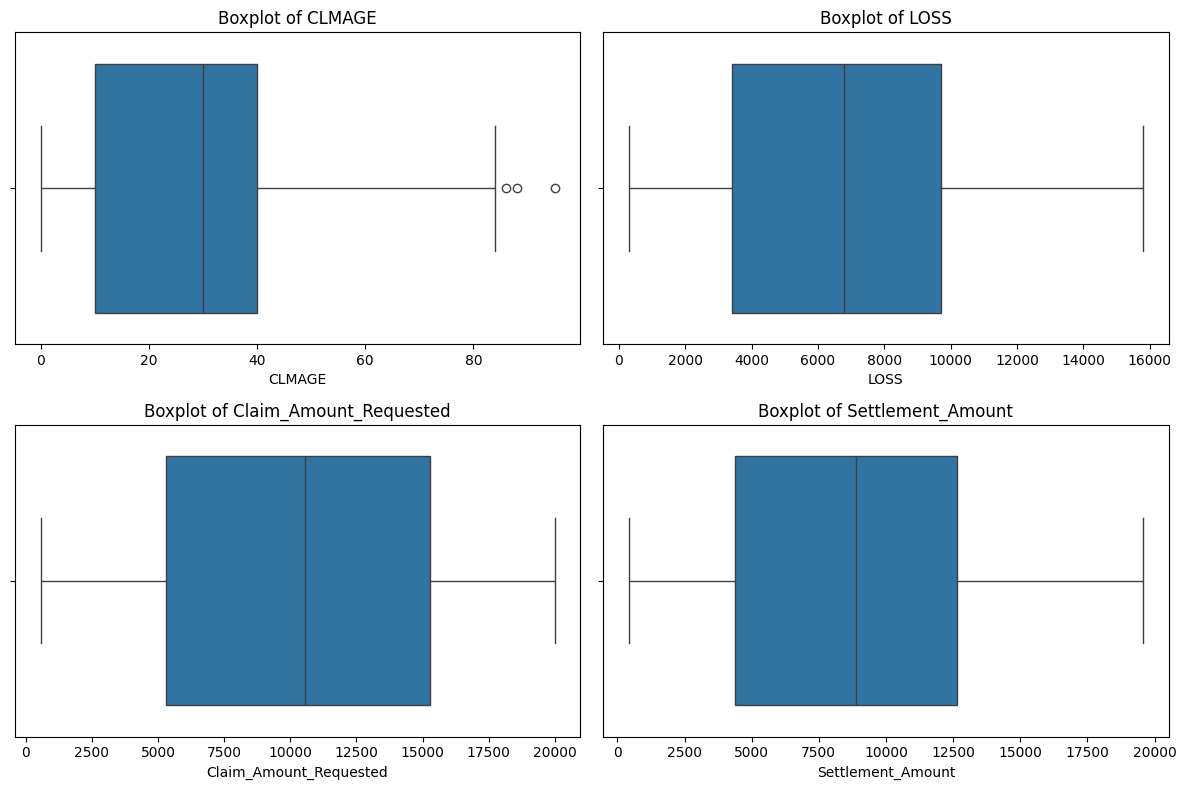

In [ ]:
# List of columns to check for outliers
columns_to_check = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']

# Create a figure with the appropriate size
plt.figure(figsize=(12, 8))

# Loop through columns and create a boxplot for each one
for i, col in enumerate(columns_to_check):
    plt.subplot(2, 2, i + 1)  # 2 rows and 2 columns of subplots
    sns.boxplot(x=data[col])  # Create a boxplot for the column
    plt.title(f'Boxplot of {col}')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()


In [ ]:
# List of numerical columns to check
numerical_columns = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']

# Loop through each numerical column and remove outliers
for col in numerical_columns:
    # Calculate IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for the column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]



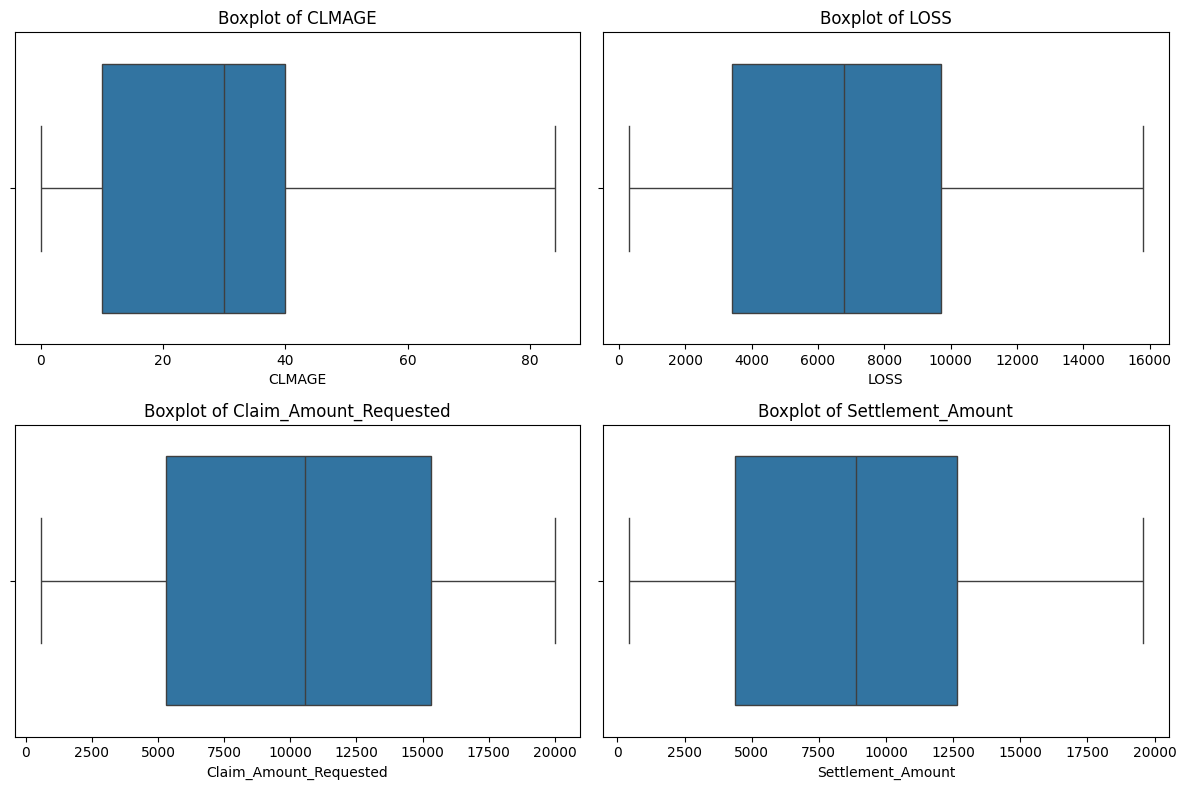

In [ ]:
# List of columns to check for outliers
columns_to_check = ['CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']

# Create a figure with the appropriate size
plt.figure(figsize=(12, 8))

# Loop through columns and create a boxplot for each one
for i, col in enumerate(columns_to_check):
    plt.subplot(2, 2, i + 1)  # 2 rows and 2 columns of subplots
    sns.boxplot(x=data[col])  # Create a boxplot for the column
    plt.title(f'Boxplot of {col}')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()


Outliers have cleared

In [ ]:
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,2.0,4497.19,1,3221.74,1,0.0
1,3,1,1.0,0.0,0.0,18.0,3746.41,0.0,6216.38,1,6166.17,0,0.0
2,66,1,0.0,1.0,0.0,5.0,14282.43,2.0,17978.55,0,13804.61,0,1.0
3,70,0,0.0,1.0,1.0,31.0,519.12,2.0,753.54,1,596.25,0,0.0
4,96,1,0.0,1.0,0.0,30.0,1354.31,0.0,2167.42,0,1714.83,0,0.0


In [ ]:
print(data['ATTORNEY'].value_counts())


ATTORNEY
0    684
1    653
Name: count, dtype: int64


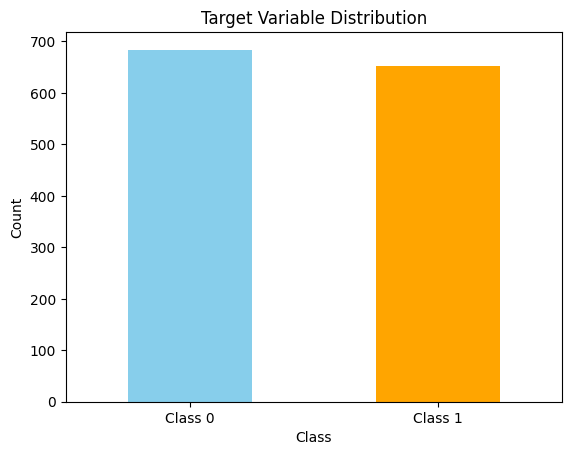

In [ ]:
import matplotlib.pyplot as plt

# Check the distribution of the target variable
data['ATTORNEY'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Target Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'], rotation=0)
plt.show()


# **Correlation matrix and heatmap:**

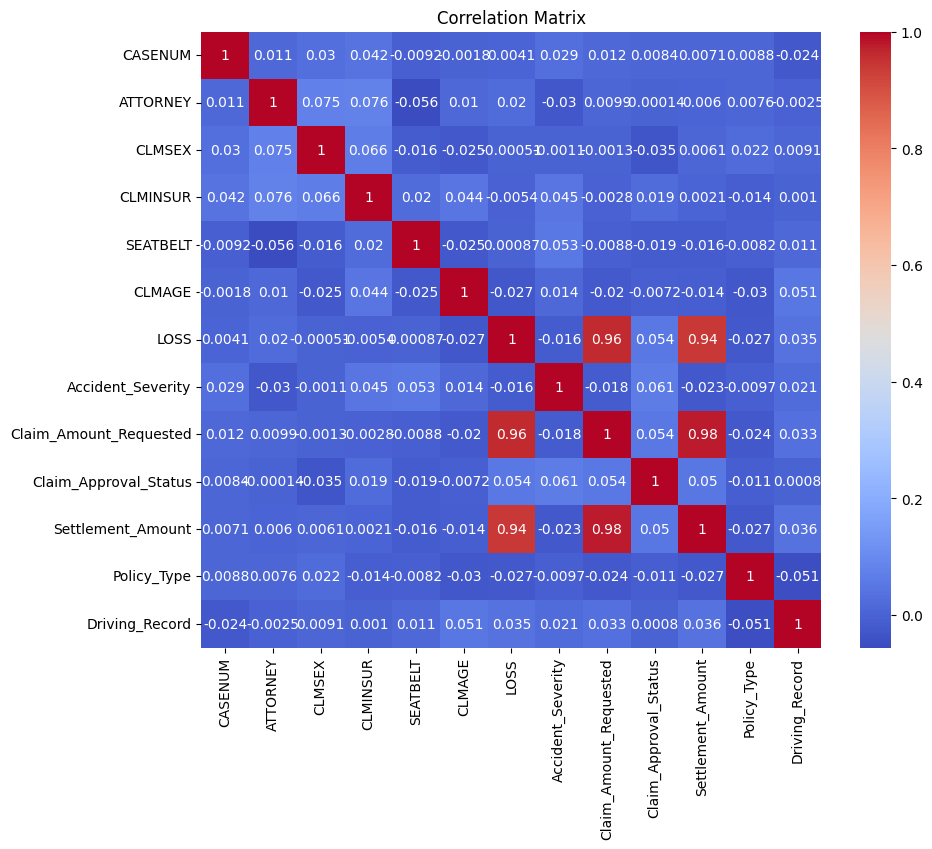

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

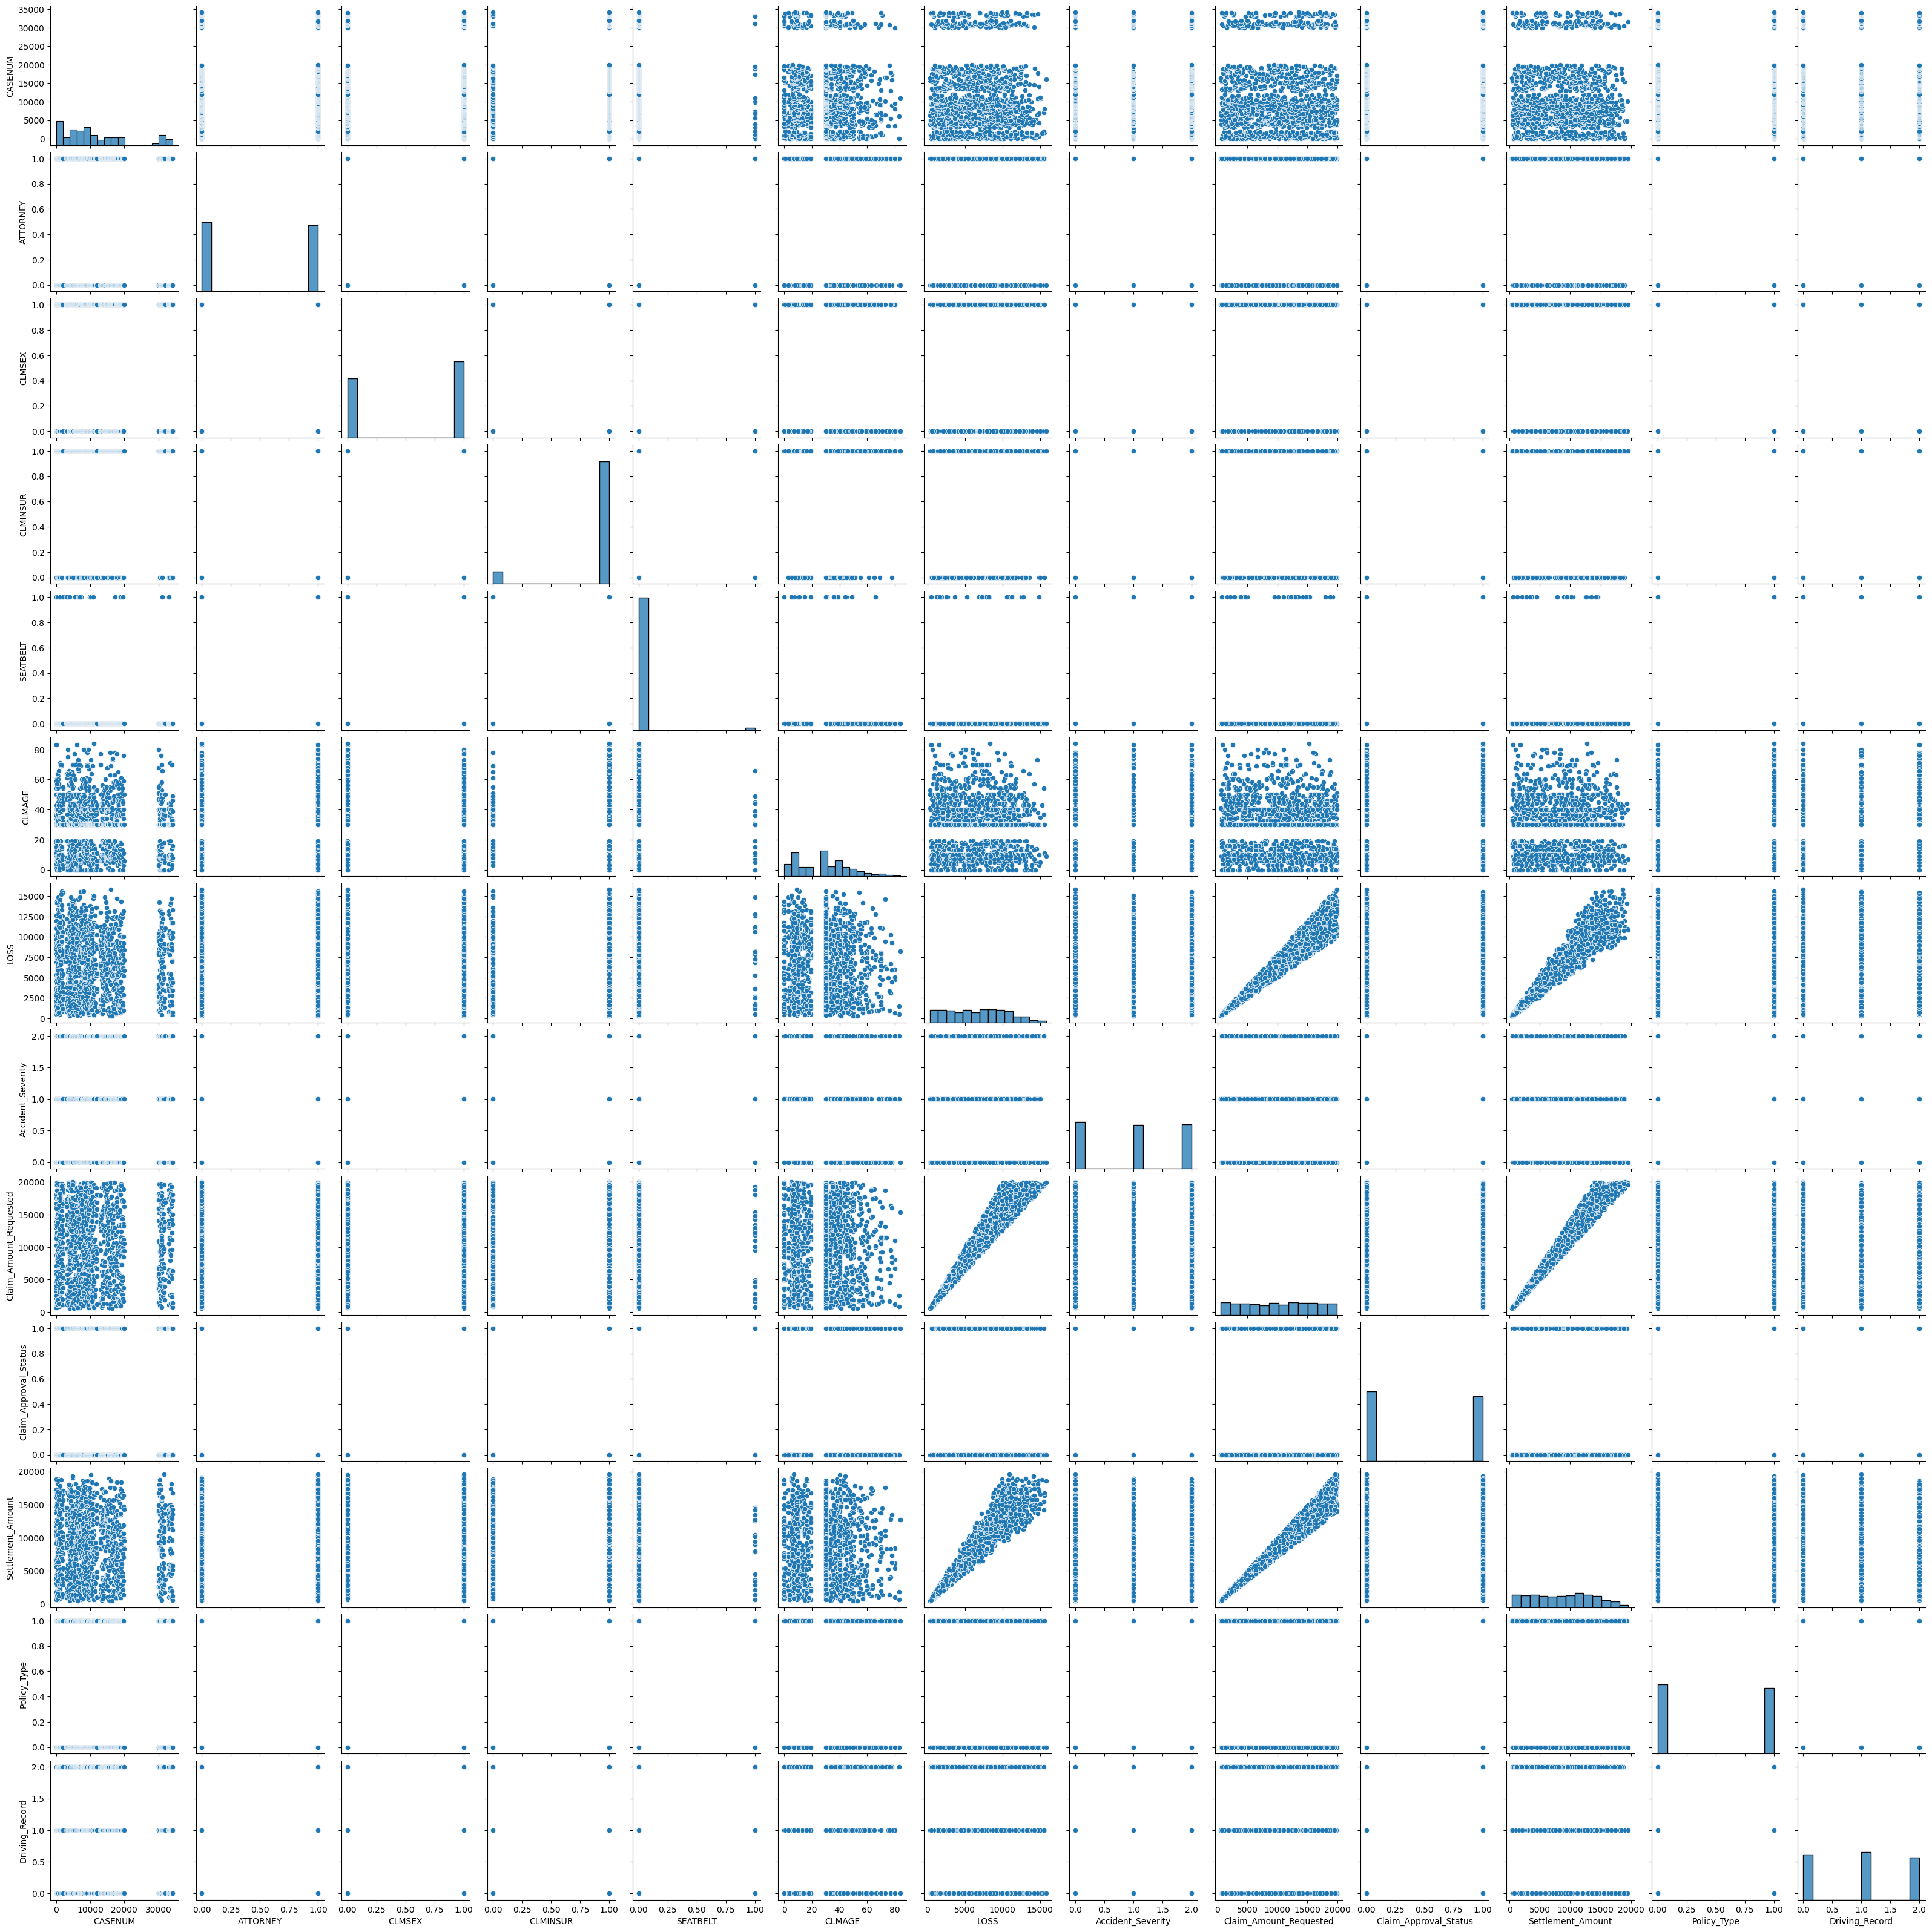

In [ ]:
sns.pairplot(data)
plt.show()


In [ ]:
# Dropping the columns CASENUM
data = data.drop(columns=['CASENUM'])

In [ ]:
# Feature Engineering
data['settlement_ratio'] = data['Settlement_Amount'] / data['Claim_Amount_Requested']
data[['settlement_ratio', 'Settlement_Amount', 'Claim_Amount_Requested']].head()

,settlement_ratio,Settlement_Amount,Claim_Amount_Requested
0,0.716390,3221.74,4497.19
1,0.991923,6166.17,6216.38
2,0.767838,13804.61,17978.55
3,0.791265,596.25,753.54
4,0.791185,1714.83,2167.42


In [ ]:
corr_matrix = data.corr()

# Set the correlation threshold (e.g., 0.9 for highly correlated features)
threshold = 0.9

# Find pairs of features with correlation greater than threshold
drop_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            drop_columns.add(colname)

# Drop highly correlated columns
data = data.drop(columns=drop_columns)

print("Dropped columns:", drop_columns)

Dropped columns: {'Claim_Amount_Requested', 'Settlement_Amount'}


In [ ]:
print("Data shape after dropping columns:", data.shape)


Data shape after dropping columns: (1337, 11)


In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and target variable (y)
X = data.drop(columns=['ATTORNEY'])  # Drop target column
y = data['ATTORNEY']

X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio
0,0.0,1.0,0.0,50.0,2367.86,2.0,1,1,0.0,0.716390
1,1.0,0.0,0.0,18.0,3746.41,0.0,1,0,0.0,0.991923
2,0.0,1.0,0.0,5.0,14282.43,2.0,0,0,1.0,0.767838
3,0.0,1.0,1.0,31.0,519.12,2.0,1,0,0.0,0.791265
4,0.0,1.0,0.0,30.0,1354.31,0.0,0,0,0.0,0.791185


In [ ]:
# standardization of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio
0,-1.133786,0.314011,-0.129345,1.154945,-1.139795,1.237763,1.038901,1.028068,-1.215122,-1.540858
1,0.882001,-3.184598,-0.129345,-0.564133,-0.775550,-1.197689,1.038901,-0.972699,-1.215122,1.673764
2,-1.133786,0.314011,-0.129345,-1.262508,2.008308,1.237763,-0.962555,-0.972699,0.027891,-0.940617
3,-1.133786,0.314011,7.731282,0.134243,-1.628274,1.237763,1.038901,-0.972699,-1.215122,-0.667291
4,-1.133786,0.314011,-0.129345,0.080522,-1.407598,-1.197689,-0.962555,-0.972699,-1.215122,-0.668228


In [ ]:
columns = data.columns
print(columns)

for col in columns:
    if data[col].nunique() <= 10:
       print(f"{col} value counts: \n{data[col].value_counts()}\n")

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS',
       'Accident_Severity', 'Claim_Approval_Status', 'Policy_Type',
       'Driving_Record', 'settlement_ratio'],
      dtype='object')
ATTORNEY value counts: 
ATTORNEY
0    684
1    653
Name: count, dtype: int64

CLMSEX value counts: 
CLMSEX
1.0    752
0.0    585
Name: count, dtype: int64

CLMINSUR value counts: 
CLMINSUR
1.0    1217
0.0     120
Name: count, dtype: int64

SEATBELT value counts: 
SEATBELT
0.0    1315
1.0      22
Name: count, dtype: int64

Accident_Severity value counts: 
Accident_Severity
0.0    462
2.0    440
1.0    435
Name: count, dtype: int64

Claim_Approval_Status value counts: 
Claim_Approval_Status
0    694
1    643
Name: count, dtype: int64

Policy_Type value counts: 
Policy_Type
0    687
1    650
Name: count, dtype: int64

Driving_Record value counts: 
Driving_Record
1.0    471
0.0    448
2.0    418
Name: count, dtype: int64



In [ ]:
# Feature importance analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importance = rf.feature_importances_
feature_names = X.columns

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)

print(importances_df)

                 Feature  Importance
4                   LOSS    0.282407
9       settlement_ratio    0.271175
3                 CLMAGE    0.209393
8         Driving_Record    0.056971
5      Accident_Severity    0.056530
6  Claim_Approval_Status    0.034564
7            Policy_Type    0.033816
0                 CLMSEX    0.028655
1               CLMINSUR    0.019399
2               SEATBELT    0.007089


In [ ]:
X_trimmed = X_scaled.drop(["CLMINSUR", "SEATBELT"], axis=1)
X_trimmed.head()

,CLMSEX,CLMAGE,LOSS,Accident_Severity,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio
0,-1.133786,1.154945,-1.139795,1.237763,1.038901,1.028068,-1.215122,-1.540858
1,0.882001,-0.564133,-0.775550,-1.197689,1.038901,-0.972699,-1.215122,1.673764
2,-1.133786,-1.262508,2.008308,1.237763,-0.962555,-0.972699,0.027891,-0.940617
3,-1.133786,0.134243,-1.628274,1.237763,1.038901,-0.972699,-1.215122,-0.667291
4,-1.133786,0.080522,-1.407598,-1.197689,-0.962555,-0.972699,-1.215122,-0.668228


In [ ]:
X_FE = X_scaled.copy()

In [ ]:
X_FE["CLMINSUR_LOSS"] = X_scaled["CLMINSUR"] * X_scaled["LOSS"]
X_FE["SEATBELT_AccidentSeverity"] = X_scaled["SEATBELT"] * X_scaled["Accident_Severity"]
X_FE.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio,CLMINSUR_LOSS,SEATBELT_AccidentSeverity
0,-1.133786,0.314011,-0.129345,1.154945,-1.139795,1.237763,1.038901,1.028068,-1.215122,-1.540858,-0.357908,-0.160098
1,0.882001,-3.184598,-0.129345,-0.564133,-0.775550,-1.197689,1.038901,-0.972699,-1.215122,1.673764,2.469816,0.154915
2,-1.133786,0.314011,-0.129345,-1.262508,2.008308,1.237763,-0.962555,-0.972699,0.027891,-0.940617,0.630632,-0.160098
3,-1.133786,0.314011,7.731282,0.134243,-1.628274,1.237763,1.038901,-0.972699,-1.215122,-0.667291,-0.511297,9.569499
4,-1.133786,0.314011,-0.129345,0.080522,-1.407598,-1.197689,-0.962555,-0.972699,-1.215122,-0.668228,-0.442002,0.154915


In [ ]:
X_FE.drop(["CLMINSUR", "SEATBELT"], axis=1, inplace=True)
X_FE.head()

,CLMSEX,CLMAGE,LOSS,Accident_Severity,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio,CLMINSUR_LOSS,SEATBELT_AccidentSeverity
0,-1.133786,1.154945,-1.139795,1.237763,1.038901,1.028068,-1.215122,-1.540858,-0.357908,-0.160098
1,0.882001,-0.564133,-0.775550,-1.197689,1.038901,-0.972699,-1.215122,1.673764,2.469816,0.154915
2,-1.133786,-1.262508,2.008308,1.237763,-0.962555,-0.972699,0.027891,-0.940617,0.630632,-0.160098
3,-1.133786,0.134243,-1.628274,1.237763,1.038901,-0.972699,-1.215122,-0.667291,-0.511297,9.569499
4,-1.133786,0.080522,-1.407598,-1.197689,-0.962555,-0.972699,-1.215122,-0.668228,-0.442002,0.154915


In [ ]:
X_FE.drop(["LOSS", "Accident_Severity"], axis=1, inplace=True)
X_FE.head()

,CLMSEX,CLMAGE,Claim_Approval_Status,Policy_Type,Driving_Record,settlement_ratio,CLMINSUR_LOSS,SEATBELT_AccidentSeverity
0,-1.133786,1.154945,1.038901,1.028068,-1.215122,-1.540858,-0.357908,-0.160098
1,0.882001,-0.564133,1.038901,-0.972699,-1.215122,1.673764,2.469816,0.154915
2,-1.133786,-1.262508,-0.962555,-0.972699,0.027891,-0.940617,0.630632,-0.160098
3,-1.133786,0.134243,1.038901,-0.972699,-1.215122,-0.667291,-0.511297,9.569499
4,-1.133786,0.080522,-0.962555,-0.972699,-1.215122,-0.668228,-0.442002,0.154915


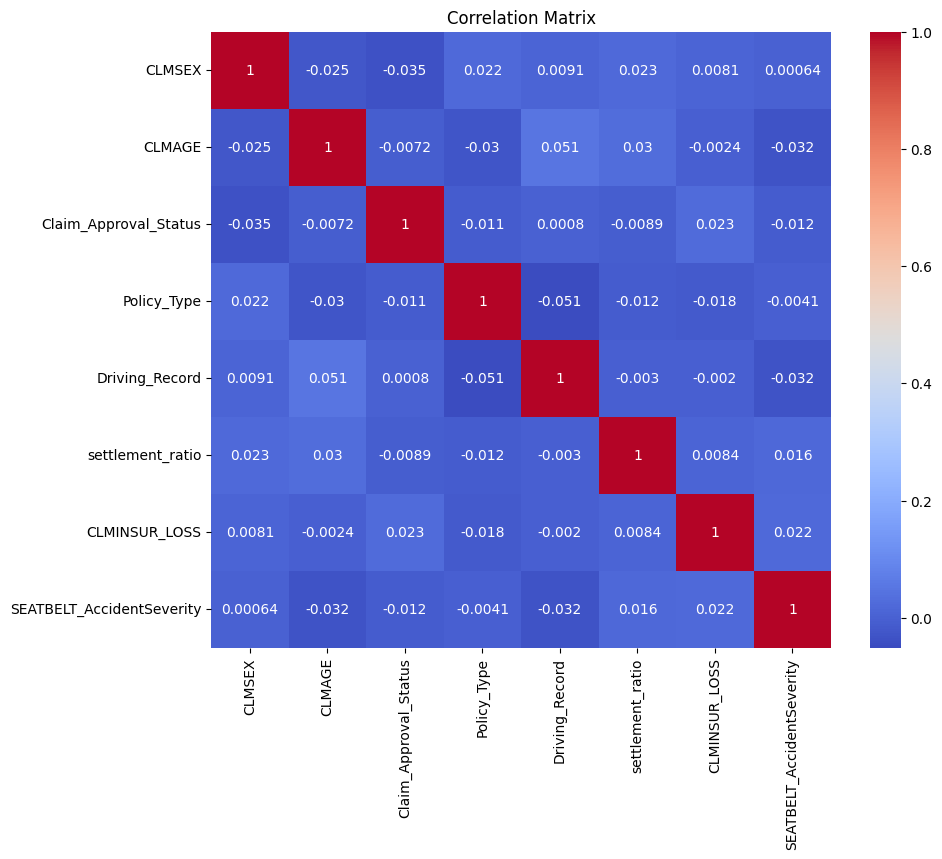

In [ ]:
correlation_matrix = X_FE.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CLMSEX                     1337 non-null   float64
 1   CLMAGE                     1337 non-null   float64
 2   Claim_Approval_Status      1337 non-null   float64
 3   Policy_Type                1337 non-null   float64
 4   Driving_Record             1337 non-null   float64
 5   settlement_ratio           1337 non-null   float64
 6   CLMINSUR_LOSS              1337 non-null   float64
 7   SEATBELT_AccidentSeverity  1337 non-null   float64
dtypes: float64(8)
memory usage: 83.7 KB


In [ ]:
# Now you can fill the NaN values
X_FE['CLMINSUR_LOSS']=X_FE['CLMINSUR_LOSS'].fillna(X_FE['CLMINSUR_LOSS'].median())
X_FE['SEATBELT_AccidentSeverity']=X_FE['SEATBELT_AccidentSeverity'].fillna(X_FE['SEATBELT_AccidentSeverity'].median())

In [ ]:
X_FE.isnull().sum()

,0
CLMSEX,0
CLMAGE,0
Claim_Approval_Status,0
Policy_Type,0
Driving_Record,0
settlement_ratio,0
CLMINSUR_LOSS,0
SEATBELT_AccidentSeverity,0


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_trimmed, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_FE, y, test_size=0.2, random_state=42)

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


Model: Logistic Regression
Accuracy: 0.5783582089552238
Confusion Matrix:
[[80 53]
 [60 75]]
Precision: 0.5859375
Recall: 0.5555555555555556
F1-score: 0.5703422053231939
AUC-ROC: 0.5785296574770259
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       133
           1       0.59      0.56      0.57       135

    accuracy                           0.58       268
   macro avg       0.58      0.58      0.58       268
weighted avg       0.58      0.58      0.58       268

Model: Decision Tree Classifier
Accuracy: 0.4925373134328358
Confusion Matrix:
[[70 63]
 [73 62]]
Precision: 0.496
Recall: 0.45925925925925926
F1-score: 0.47692307692307695
AUC-ROC: 0.4927875243664718
              precision    recall  f1-score   support

           0       0.49      0.53      0.51       133
           1       0.50      0.46      0.48       135

    accuracy                           0.49       268
   macro avg       0.49      0.49      0.49       268
we

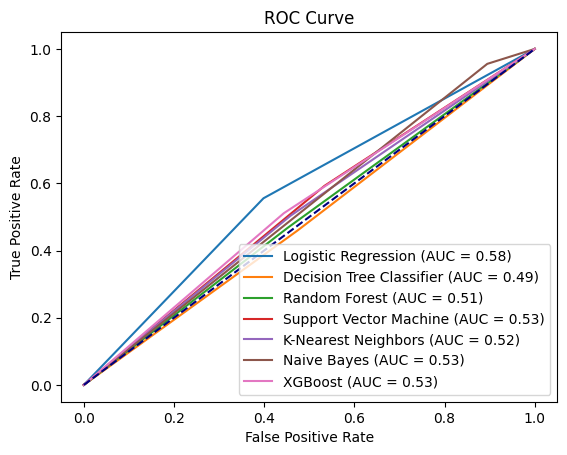

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

from sklearn.svm import SVC
svc  = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)

from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)
y_pred_nbc = nbc.predict(X_test)

from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state=42)
xgbc.fit(X_train, y_train)
y_pred_xgbc = xgbc.predict(X_test)


# Evaluate each model
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-score: {f1_score(y_test, y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred):.2f})')

# Evaluate each model
evaluate_model(y_test, y_pred_log, 'Logistic Regression')
evaluate_model(y_test, y_pred_dtc, 'Decision Tree Classifier')
evaluate_model(y_test, y_pred_rfc, 'Random Forest')
evaluate_model(y_test, y_pred_svc, 'Support Vector Machine')
evaluate_model(y_test, y_pred_knc, 'K-Nearest Neighbors')
evaluate_model(y_test, y_pred_nbc, 'Naive Bayes')
evaluate_model(y_test, y_pred_xgbc, 'XGBoost')


# Plot ROC curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Random model
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



In [ ]:
from sklearn.model_selection import cross_val_score

# Define models in a dictionary for easy iteration
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dtc,
    'Random Forest': rfc,
    'SVM': svc,
    'K-Nearest Neighbors': knc,
    'Naive Bayes': nbc,
    'XGBoost': xgbc
}

# Perform cross-validation for each model
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"{model_name} - Cross-validated accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Logistic Regression - Cross-validated accuracy: 0.53 ± 0.02
Decision Tree - Cross-validated accuracy: 0.52 ± 0.02
Random Forest - Cross-validated accuracy: 0.51 ± 0.03
SVM - Cross-validated accuracy: 0.52 ± 0.01
K-Nearest Neighbors - Cross-validated accuracy: 0.49 ± 0.02
Naive Bayes - Cross-validated accuracy: 0.52 ± 0.01
XGBoost - Cross-validated accuracy: 0.51 ± 0.03


Target distribution is balanced

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest and Logistic Regression
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.1, 1, 10],  # Regularization strength for Logistic Regression
    'solver': ['liblinear', 'lbfgs'],  # Solver options
    'max_iter': [100, 200, 300]
}

# Perform GridSearchCV for Random Forest
grid_rf = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

# Perform GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(estimator=logreg, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lr.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}


Model: Random Forest (Tuned)
Accuracy: 0.48880597014925375
Confusion Matrix:
[[74 59]
 [78 57]]
Precision: 0.49137931034482757
Recall: 0.4222222222222222
F1-score: 0.4541832669322709
AUC-ROC: 0.4893065998329157
              precision    recall  f1-score   support

           0       0.49      0.56      0.52       133
           1       0.49      0.42      0.45       135

    accuracy                           0.49       268
   macro avg       0.49      0.49      0.49       268
weighted avg       0.49      0.49      0.49       268

Model: Logistic Regression (Tuned)
Accuracy: 0.5783582089552238
Confusion Matrix:
[[80 53]
 [60 75]]
Precision: 0.5859375
Recall: 0.5555555555555556
F1-score: 0.5703422053231939
AUC-ROC: 0.5785296574770259
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       133
           1       0.59      0.56      0.57       135

    accuracy                           0.58       268
   macro avg       0.58      0.58     

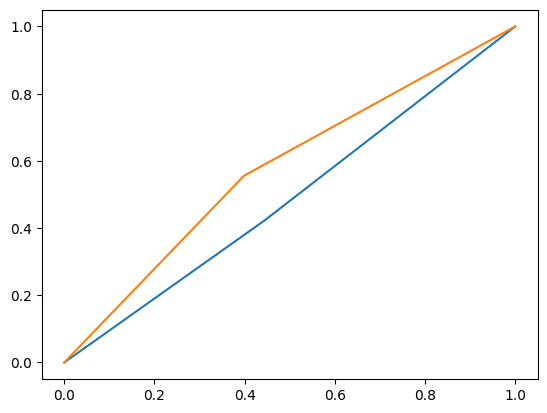

In [ ]:
# Train the models with best hyperparameters
best_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)
best_rf.fit(X_train, y_train)

best_lr = LogisticRegression(
    C=0.1,
    max_iter=100,
    solver='lbfgs',
    random_state=42
)
best_lr.fit(X_train, y_train)

# Evaluate the models
y_pred_rf = best_rf.predict(X_test)
y_pred_lr = best_lr.predict(X_test)

# Evaluate each model
evaluate_model(y_test, y_pred_rf, 'Random Forest (Tuned)')
evaluate_model(y_test, y_pred_lr, 'Logistic Regression (Tuned)')


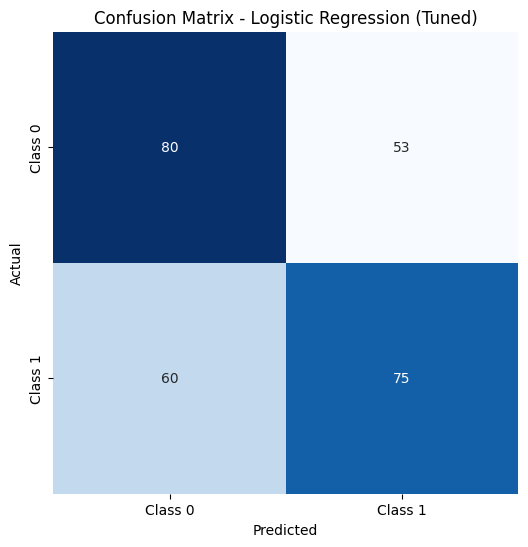

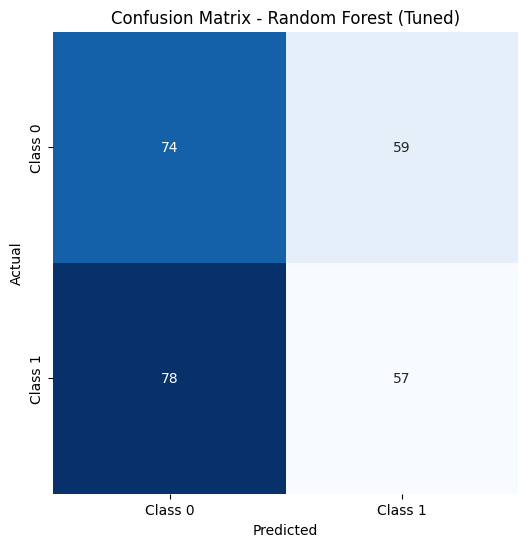

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# For Logistic Regression
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression (Tuned)")

# For Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest (Tuned)")


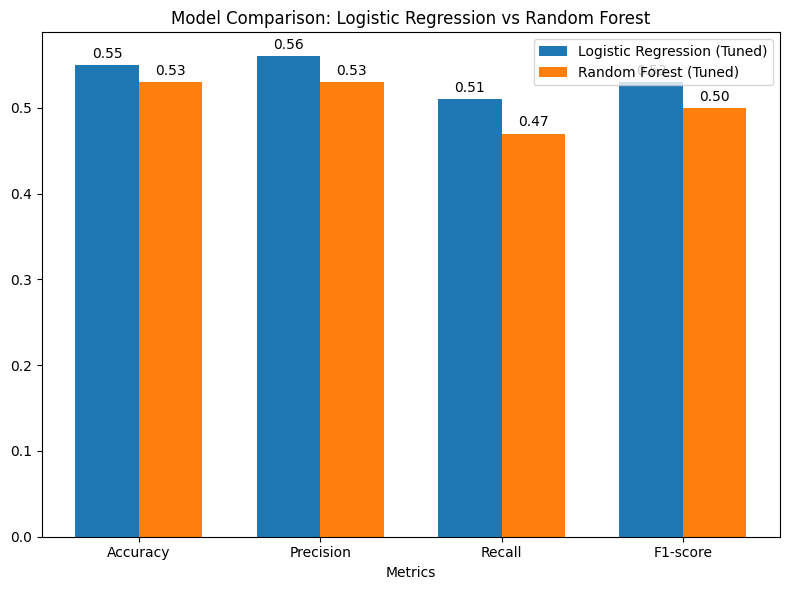

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
lr_scores = [0.55, 0.56, 0.51, 0.53]
rf_scores = [0.53, 0.53, 0.47, 0.50]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the bars for both models
rects1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression (Tuned)')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest (Tuned)')

# Adding labels, title and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_title('Model Comparison: Logistic Regression vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Adding the scores on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

# Show the plot
plt.tight_layout()
plt.show()


Conclusion:
After evaluating multiple classification models, Logistic Regression (Tuned) was selected for deployment based on its overall performance. Although the model's accuracy is relatively modest at 0.55, the F1-score of 0.53 strikes a balance between precision and recall, making it suitable for the task of predicting attorney involvement in insurance claims.

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

# Assuming your model is trained and stored in the 'model' variable
model = LogisticRegression()  # Example; replace with your actual model
model.fit(X_train, y_train)  # Train the model with your data

# Now, save the trained model to a pickle file
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
print(type(model))  # This should print: <class 'sklearn.linear_model._logistic.LogisticRegression'>


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [ ]:
import pickle

# Load the model in your Streamlit app
model = pickle.load(open('logistic_regression_model.pkl', 'rb'))
